Inital parameters are: [[1, 1, 0.5], [5, 1, 0.5]]


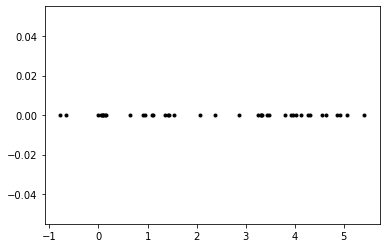

In [116]:
import csv # to read the csv file
import random as rnd
import numpy as np
import math
import matplotlib.pyplot as plot

# the number of clusters is 2

# read the data points
data = list(csv.reader(open('2020_em_clustering.csv')))[0]
for i in range(0, len(data)):
    data[i] = float(data[i])

# parameters are mean, variance and weight respectively
theta = [[1, 1, 0.5], [5, 1, 0.5]]
cluster = [[],[]]
maximum_iteration = 200

# The random parameter allocation was not working often. So I removed it.
# initialize the parameters randomly with equal weights at the start
# for d in data:
#     cluster[int(rnd.random() > 0.5)].append(float(d))

print("Inital parameters are", end = ': ')
# theta[0][0] = np.mean(cluster[0]) # initialize mean
# theta[0][1] = np.var(cluster[0]) # initialize variance
# theta[0][2] = len(cluster[0]) / len(data) # initialize inital weight
# theta[1][0] = np.mean(cluster[1]) # initilize mean
# theta[1][1] = np.var(cluster[1]) # intialize variance
# theta[1][2] = len(cluster[1]) / len(data) # initialize inital weight

print(theta)

# Now progress with the EM clustering from here
for it in range(0, maximum_iteration):
    # find the probability of each data belonging to the some cluster
    prob = []
    nij = []
    for c in range(0, 2):
        prob.append([])
        for d in data:
            prob[c].append(theta[c][2] * (1 / (2 * math.pi * theta[c][1] ** 2)) * math.exp(-0.5 * (float(d) - theta[c][0]) ** 2 / theta[c][1] ** 2))
    
    for num in range(0, len(data)):
        sum = 0
        for c in range(0, 2):
            sum += prob[c][num]
        for c in range(0, 2):
            prob[c][num] = prob[c][num] / sum
    
    # the effective number of data points assigned to each of the cluster
    for c in range(0, 2):
        nij.append(np.mean(prob[c]) * len(data))
    
    for c in range(0, 2):
        # update the mean
        sum = 0.0
        for d in range(0, len(data)):
            sum += (prob[c][d] * data[d])
        sum /= nij[c]
        theta[c][0] = sum

        # update the variance
        sum = 0.0
        for d in range(0, len(data)):
            sum += (prob[c][d] * (data[d] - theta[c][0]) ** 2);
        sum /= nij[c]
        theta[c][1] = sum

        # update the weight
        theta[c][2] = nij[c] / len(data)

for d in data:
    plot.scatter(d, 0, color="black", marker=".")

The final parameters are: [[0.706227880489321, 0.715474899070027, 0.5010015317663352], [4.040404523069073, 0.4763394242297342, 0.4989984682336647]]


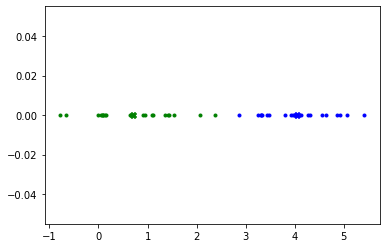

In [117]:
print("The final parameters are", end=": ")
print(theta)
prob = []
nij = []
for c in range(0, 2):
    prob.append([])
    for d in data:
        prob[c].append(theta[c][2] * (1 / (2 * math.pi * theta[c][1] ** 2)) * math.exp(-0.5 * (float(d) - theta[c][0]) ** 2 / theta[c][1] ** 2))
    
for num in range(0, len(data)):
    sum = 0
    for c in range(0, 2):
        sum += prob[c][num]
    for c in range(0, 2):
        prob[c][num] = prob[c][num] / sum
    
    if(prob[1][num] < prob[0][num]):
        plot.scatter(data[num], 0, color="green", marker=".")
    else:
        plot.scatter(data[num], 0, color="blue", marker=".")

plot.scatter(theta[0][0], 0, color="green", marker="X")
plot.scatter(theta[1][0], 0, color="blue", marker="X")